# Installing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/baniyas/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#Reading the dataset

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

## Exploratory Data Analysis

#Checking for missing values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Checking for duplicate values

In [5]:
#Checking for duplicate values in the cell.

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1337, 7)

#View the datatype in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#Checking unique value in each column

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#Numerical column statistics

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Splitting the dataset into Numerical & Categorical Features

In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype!='O']
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
target = "charges"

print('We have {} numerical features :{}'.format(len(num_features),num_features))
print('We have {} categorical features :{}'.format(len(cat_features),cat_features))
      
print("\n Categories in 'sex' variable:  ", end = "  ")
print(df['sex'].unique())
      
      
print("\n Categories in 'smoker' variable:  ", end = "  ")
print(df['smoker'].unique())

print("\n Categories in 'region' variable:  ", end = "  ")
print(df['region'].unique())

We have 4 numerical features :['age', 'bmi', 'children', 'charges']
We have 3 categorical features :['sex', 'smoker', 'region']

 Categories in 'sex' variable:    ['female' 'male']

 Categories in 'smoker' variable:    ['yes' 'no']

 Categories in 'region' variable:    ['southwest' 'southeast' 'northwest' 'northeast']


#Adding an age range categorical column where age between 0-30 are considered 'young', 31-60 are considered 'middle-aged' and 61-100 are considerd as 'old'



In [13]:
df['age_range'] = 'old'
df.loc[(df['age'] > 0) &(df['age']<=30), 'age_range'] = 'young'
df.loc[(df['age'] > 30) &(df['age']<=60), 'age_range'] = 'middle-aged'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged


#Adding a bmi range categorical column where bmi <18.5 falls under underweight range , 18.5-24.9 falls under normal range, 25-29.9 falls under overweight range and >30.0 falls under obese range




In [14]:
df['bmi_range'] = 'normal'
df.loc[(df['bmi'] < 18.5), 'bmi_range'] = 'underweight'
df.loc[(df['bmi'] > 25.0) & (df['bmi'] < 29.9), 'bmi_range'] = 'overweight'
df.loc[(df['bmi'] > 30.0), 'bmi_range'] = 'obese'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


#Let's overview the statistics of the data

In [15]:
df.value_counts(['sex'])

sex   
male      675
female    662
dtype: int64

In [16]:
pd.crosstab(df['sex'] , df['age_range'], normalize=True)

age_range,middle-aged,old,young
sex,,,
female,0.299925,0.035153,0.160060
male,0.300673,0.032909,0.171279


In [17]:
df.value_counts(['region'])

region   
southeast    364
southwest    325
northeast    324
northwest    324
dtype: int64

In [18]:
pd.crosstab(df['region'] , df['smoker'], normalize=True)

smoker,no,yes
region,,
northeast,0.192221,0.050112
northwest,0.198953,0.043381
southeast,0.204188,0.068063
southwest,0.199701,0.043381


# Analysis & Visualization

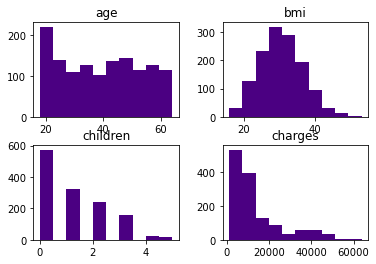

In [19]:
df.hist(color='indigo',grid=False,)
plt.show()

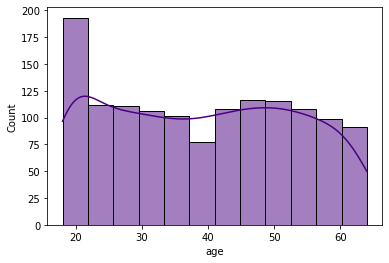

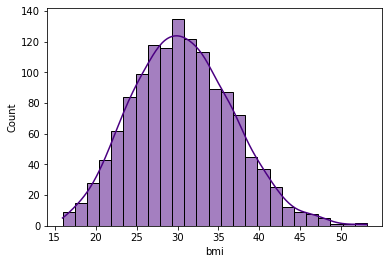

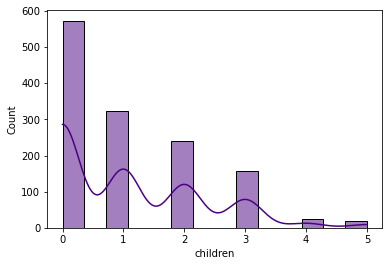

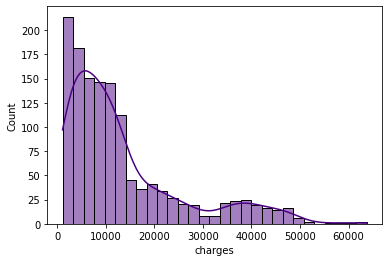

In [20]:
for column in num_features:
    sns.histplot(data = df , x = column , kde = True, fill=True, color='indigo')
    plt.show()

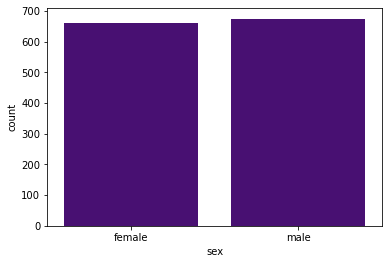

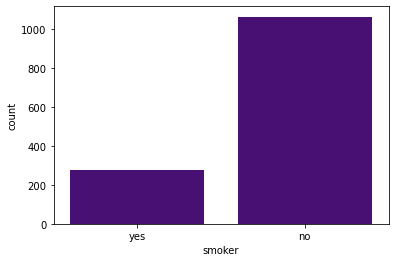

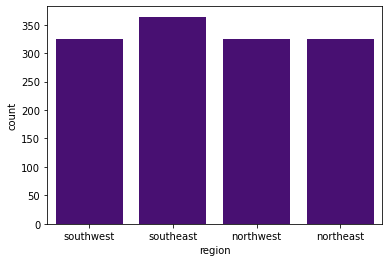

In [21]:
for column in cat_features:
    sns.countplot(data = df , x = column, color='indigo',)
    plt.show()

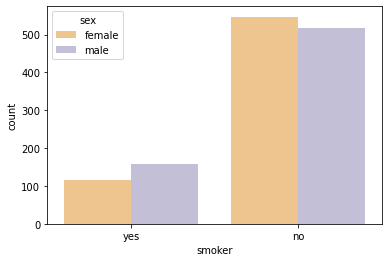

In [22]:
sns.countplot(data =df , x = 'smoker' , hue = 'sex' , palette='PuOr')
plt.show()

In [23]:
#Relationship Between Age and Medical Expenses:

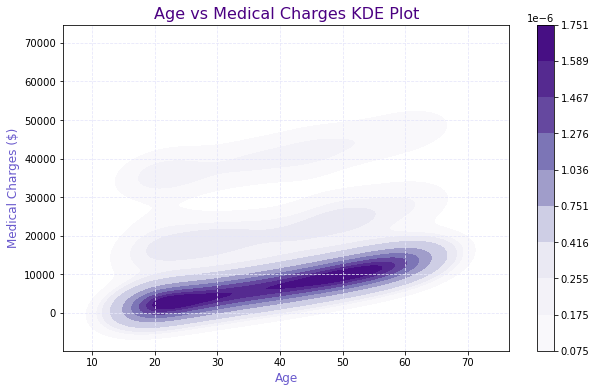

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="age", y="charges", cmap="Purples", shade=True, cbar=True)

plt.title("Age vs Medical Charges KDE Plot", fontsize=16, color='indigo')
plt.xlabel("Age", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

#From the above graph we can visualize that older adults are incurring the higher medical expenses. Conversely,here the younger age group shows very low charges, this indicates that people in their early years of adulthood tend to have fewer health-related expenses.

In [25]:
#Relationship between Gender and Average Medical Expenses

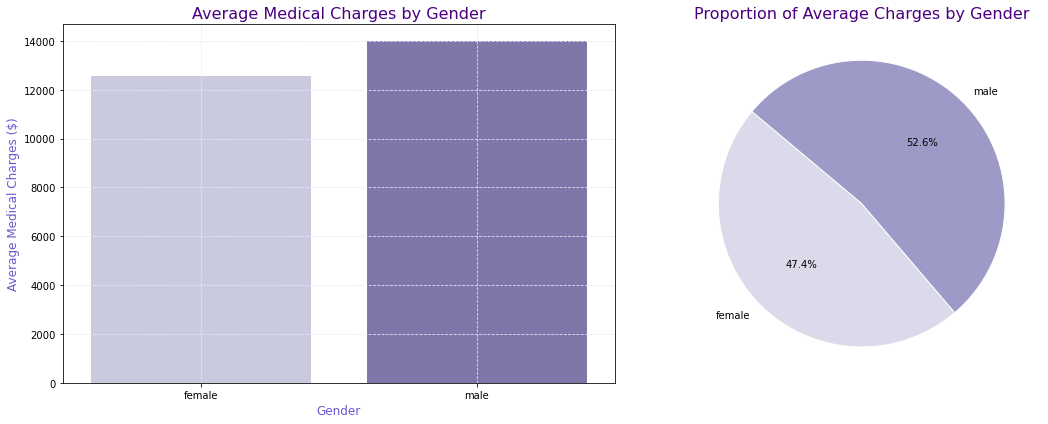

In [26]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
colors = sns.color_palette("Purples", 3) 

sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Gender", fontsize=16, color='indigo')
axes[0].set_xlabel("Gender", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')


axes[1].pie(average_charges_by_sex['charges'], labels=average_charges_by_sex['sex'], autopct='%1.1f%%',colors=colors, 
    startangle=140, wedgeprops={'edgecolor': 'white'})
axes[1].set_title("Proportion of Average Charges by Gender", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Here the bar plot will give us an idea male tends to incur higher medical charges on average.This might point to differences in healthcare utilization, lifestyle or medical conditions based on gender.

In [27]:
#Relationship Between BMI and Medical Expenses:

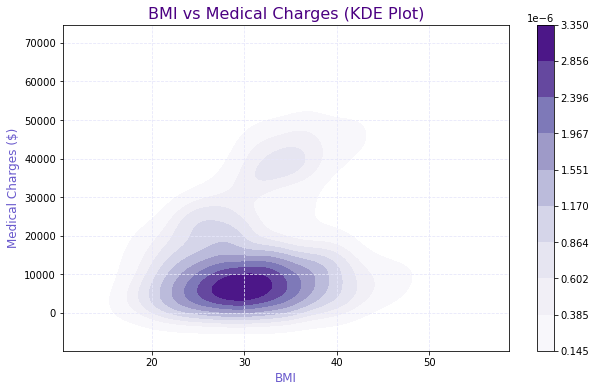

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="bmi", y="charges", cmap="Purples", shade=True,cbar=True)
plt.title("BMI vs Medical Charges (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()


#The plot is darkest (purplish) between mid-range 25-35. This indicates a high concentration of people with similar BMI values and medical charges. 

#We can see a trend indicating whether higher BMI correlates with higher medical charges. This could show a positive correlation, as higher BMI often leads to more health complications and, consequently, higher medical costs.

In [29]:
#Cost Analysis by Region:

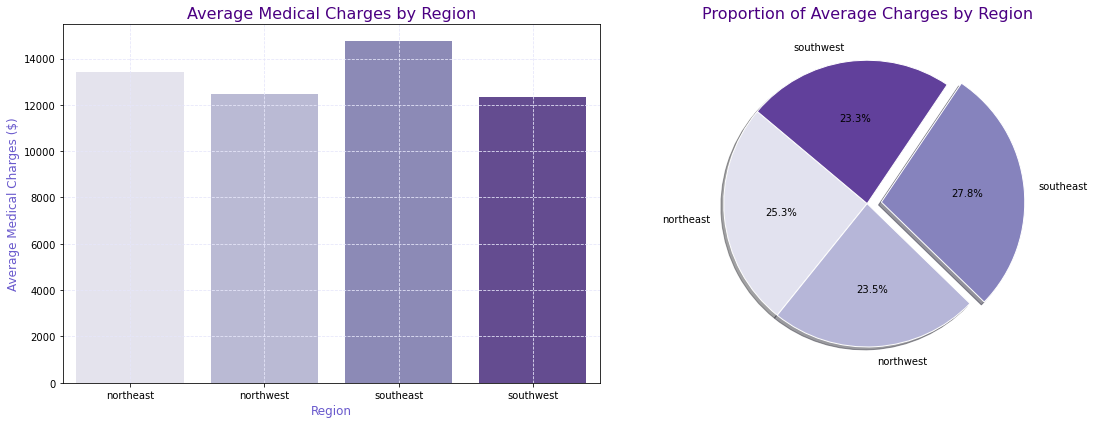

In [30]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
colors = sns.color_palette("Purples", len(average_charges_by_region))  


sns.barplot(ax=axes[0], data=average_charges_by_region, x="region", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Region", fontsize=16, color='indigo')
axes[0].set_xlabel("Region", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_region['charges']
regions = average_charges_by_region['region']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))] 
axes[1].pie(charges, labels=regions, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
    startangle=140, wedgeprops={'edgecolor': 'white'})
axes[1].set_title("Proportion of Average Charges by Region", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


#We can visualize that all the regions have similar costing for healthcare systems. 

In [31]:
#Relationship Between Number of Children and Expenses:

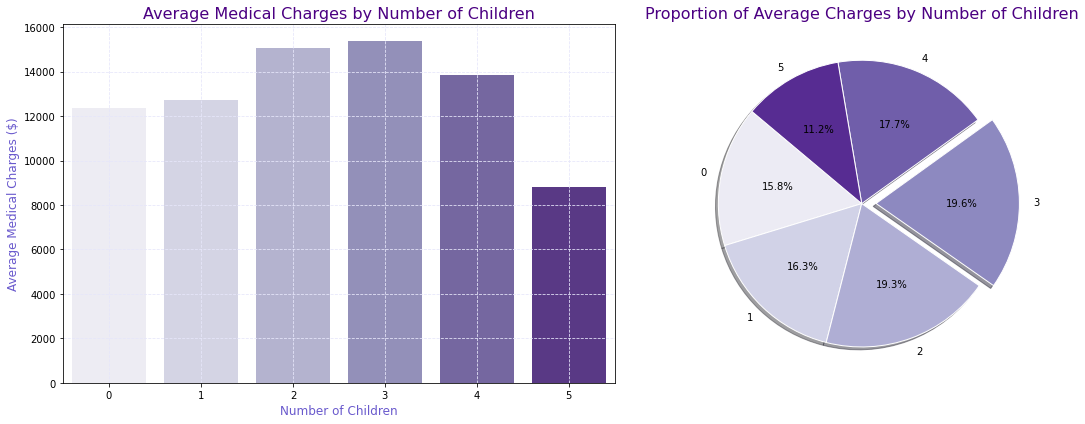

In [32]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  
colors = sns.color_palette("Purples", len(average_charges_by_children))  


sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Number of Children", fontsize=16, color='indigo')
axes[0].set_xlabel("Number of Children", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_children['charges']
children = average_charges_by_children['children']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))] 
axes[1].pie(charges, labels=children, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
    startangle=140, wedgeprops={'edgecolor': 'white'})
axes[1].set_title("Proportion of Average Charges by Number of Children", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

In [33]:
#Combined Effect of Smoking, BMI and Expenses:

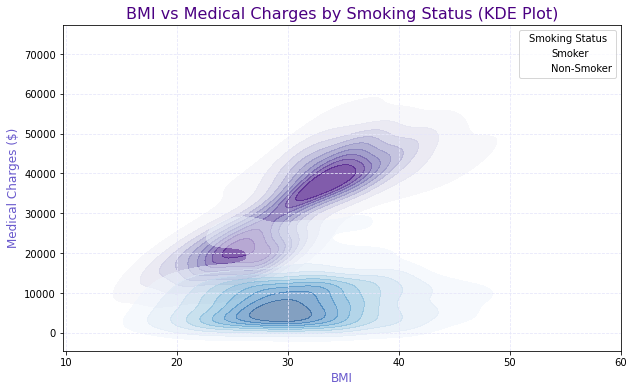

In [34]:
plt.figure(figsize=(10, 6))

sns.kdeplot( data=df[df['smoker'] == 'yes'], x="bmi", y="charges", cmap="Purples", shade=True, alpha=0.7, 
    label="Smoker", linewidth=2)

sns.kdeplot(data=df[df['smoker'] == 'no'], x="bmi", y="charges", cmap="Blues", shade=True, alpha=0.5, 
            label="Non-Smoker",linewidth=2)

plt.title("BMI vs Medical Charges by Smoking Status (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, linestyle='--', color='lavender')
plt.legend(title="Smoking Status")
plt.show()

#Smokers with higher BMIs tend to have a more concentrated, higher density of medical charges, which suggests that smoking could be exacerbating healthcare costs for individuals with higher BMI.

#Non-smokers seem to have a wider distribution of charges, indicating that medical expenses for non-smokers are more evenly spread across various BMI categories. This could suggest that non-smokers, even with high BMI, may not experience the same compounding medical costs associated with smoking.

#There is an overall trend suggesting that higher BMI correlates with higher medical charges for both smokers and non-smokers, but this effect seems more pronounced in smokers.

# Lets analyse the below questions on the above data:

1. What percent of young people are overweight and obese?

2. What percent of middle-aged and old people are normal?

3. What percent of total people have children <=2 and what percent have>2?

4. What percent of middle aged and old peole have 0 children?

# Analysis and Visualisations


1. What percent of young people are overweight and obese?

In [35]:
#Analysis

young_df = df[df['age_range'] == 'young']
young_overweight_percent = (young_df[young_df['bmi_range']=='overweight']['age_range'].count()/len(young_df))*100
young_obese_percent = (young_df[young_df['bmi_range']=='obese']['age_range'].count()/len(young_df))*100
young_normal_percent = (young_df[young_df['bmi_range']=='normal']['age_range'].count()/len(young_df))*100
young_underweight_percent = (young_df[young_df['bmi_range']=='underweight']['age_range'].count()/len(young_df))*100


print("Young people percentage that are overweight: {}%".format(round(young_overweight_percent,2)))
print("Young people percentage that are obese: {}%".format(round(young_obese_percent,2)))
print("Young people percentage that are normal: {}%".format(round(young_normal_percent,2)))
print("Young people percentage that are underweight: {}%".format(round(young_underweight_percent,2)))

Young people percentage that are overweight: 26.86%
Young people percentage that are obese: 48.76%
Young people percentage that are normal: 21.9%
Young people percentage that are underweight: 2.48%


In [36]:
print(young_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_range', 'bmi_range'],
      dtype='object')


In [37]:
young_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        443 non-null    int64  
 1   sex        443 non-null    object 
 2   bmi        443 non-null    float64
 3   children   443 non-null    int64  
 4   smoker     443 non-null    object 
 5   region     443 non-null    object 
 6   charges    443 non-null    float64
 7   age_range  443 non-null    object 
 8   bmi_range  443 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 34.6+ KB


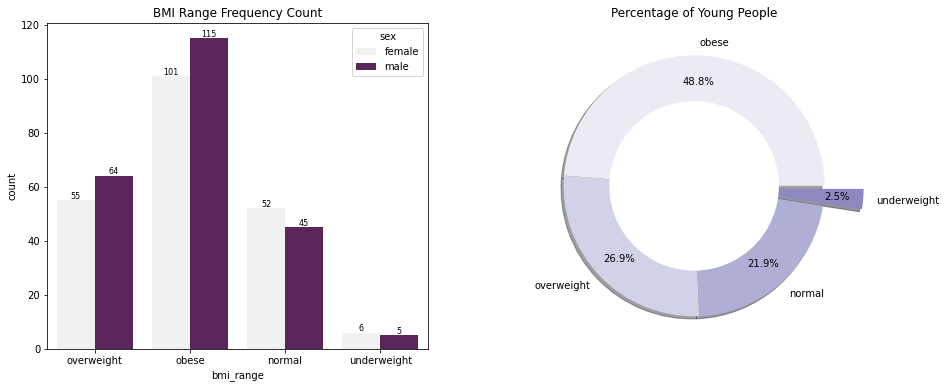

In [38]:
# Visualization
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data = young_df, x='bmi_range', hue='sex',color='Purple', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Purples'),pctdistance=0.80)

plt.title("Percentage of Young People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

#From the count plot we can visualize that most of the young people are obese which indiactes that they do not follow a healthy lifestyle.

#As 48.8% of the young people are obese which is a cause of concern and need for public health intervention.

2. What percent of middle-aged and old people are normal?

In [39]:
#Analysis

not_young_df = df[df['age_range'].isin(['middle-aged','old'])]

not_young_overweight_percent = (not_young_df[not_young_df['bmi_range']=='overweight']['age_range'].count()/len(not_young_df))*100
not_young_obese_percent = (not_young_df[not_young_df['bmi_range']=='obese']['age_range'].count()/len(not_young_df))*100
not_young_normal_percent = (not_young_df[not_young_df['bmi_range']=='normal']['age_range'].count()/len(not_young_df))*100
not_young_underweight_percent = (not_young_df[not_young_df['bmi_range']=='underweight']['age_range'].count()/len(not_young_df))*100


print("Young people percentage that are overweight: {}%".format(round(not_young_overweight_percent,2)))
print("Young people percentage that are obese: {}%".format(round(not_young_obese_percent,2)))
print("Young people percentage that are normal: {}%".format(round(not_young_normal_percent,2)))
print("Young people percentage that are underweight: {}%".format(round(not_young_underweight_percent,2)))

Young people percentage that are overweight: 28.3%
Young people percentage that are obese: 54.59%
Young people percentage that are normal: 16.11%
Young people percentage that are underweight: 1.01%


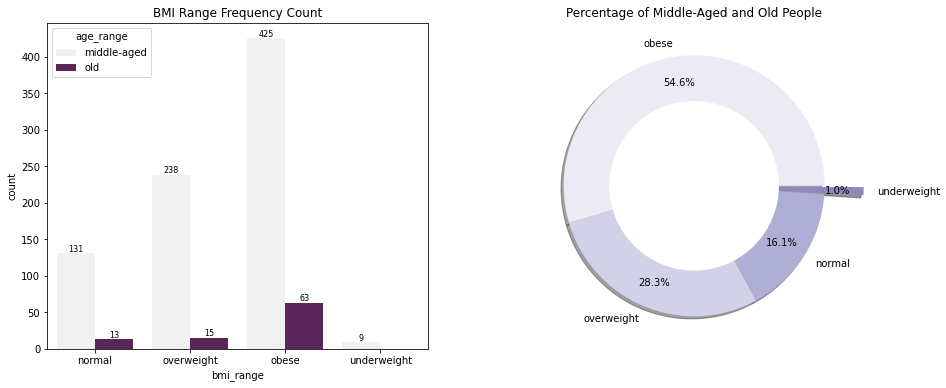

In [40]:
# Visualization
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data = not_young_df, x='bmi_range', hue='age_range',color='Purple', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=not_young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3], shadow=True, colors=sns.color_palette('Purples'), pctdistance=0.80)
plt.title("Percentage of Middle-Aged and Old People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

#From the count plot we can visualize that maximum middle-aged people are overweight and obese and a point of serious health concern.

#More that 80% of the middle-aged and old people are overweight and obese.We could suggest the need for targeted health interventions such as weight management programs, fitness initiatives, or nutrition counseling aimed at reducing obesity-related health risks.

3. What percent of total people have children <=2 and what percent have>2?

In [41]:
#Analysis

children_lte_2 = df[df['children'] <= 2]
children_gt_2 = df[df['children'] > 2]

print("Number and Percentage of people with less than or equal to 2 children: {}, {}%".format(len(children_lte_2),round(len(children_lte_2)/len(df)*100,2)))
print("Number and Percentage of people with more than 2 children: {}, {}%".format(len(children_gt_2),round(len(children_gt_2)/len(df)*100,2)))

print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(children_lte_2['charges'].sum()/len(children_lte_2),2)))
print("\nAverage charges of people with more than 2 children: {}".format(round(children_gt_2['charges'].sum()/len(children_gt_2),2)))

Number and Percentage of people with less than or equal to 2 children: 1137, 85.04%
Number and Percentage of people with more than 2 children: 200, 14.96%

Average charges of people with less than or equal to 2 children: 13051.0

Average charges of people with more than 2 children: 14576.0


#From the above analysis, as can be seen, even though the number of people with children more then 2 is less than the 
those of people with less then or equal to 2, the average of charges for the former group is higher then the latter
group. That means, more the children, more the medical cost.

#Now lets utilise it using the violin plots

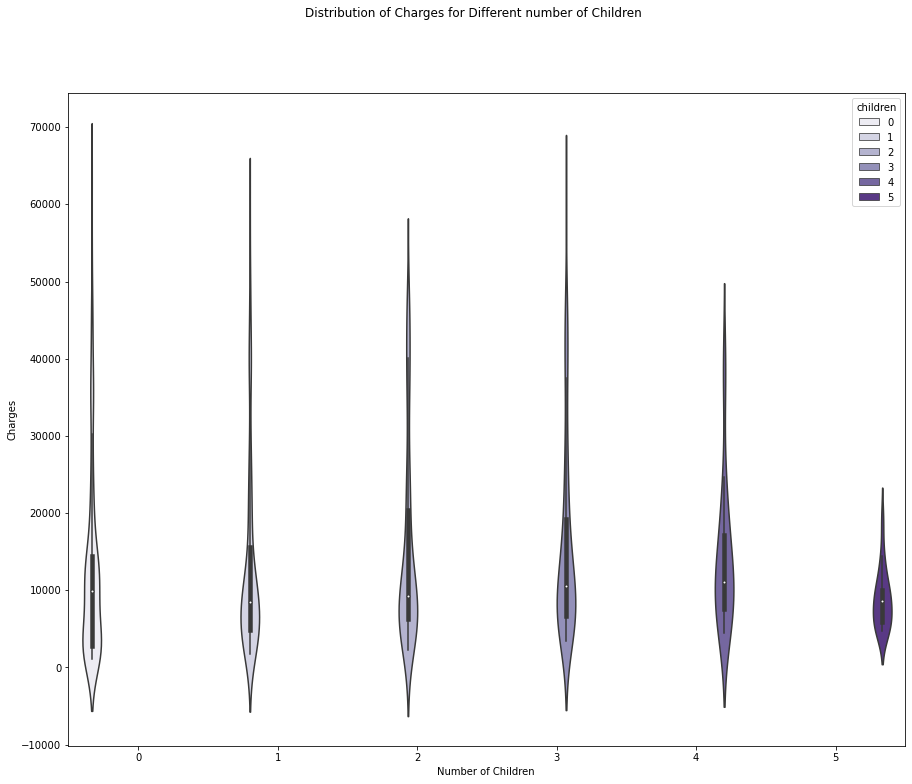

In [42]:
#Visualisation

plt.figure(figsize=(15,12))

combined_df = pd.concat([children_lte_2, children_gt_2], axis=0)

sns.violinplot(x='children', y='charges', hue='children', data= combined_df, palette='Purples')
plt.suptitle('Distribution of Charges for Different number of Children')
plt.xlabel('Number of Children ')
plt.ylabel('Charges')


plt.show()

#From the above violen plots, an interesteing observation is that the maximum value of charges for people with 2 and 
3 children is almost same. And consequently, maximum values of people with 4 and 5 children have thier maximum values
less than those of 0 and 1 children.

#Also as can be seen in the violen plots, there are lot of outliers. That means, the avergae vales calculated in the 
previous analysis might have been affected by the outlers.


In [43]:
len(children_lte_2),len(children_gt_2)

(1137, 200)

In [44]:
#Checking for Outliers

In [45]:
#Interquartile Range
#For people with children less than or equal to 2

q1_lte2 = children_lte_2['charges'].quantile(0.25)
q3_lte2 = children_lte_2['charges'].quantile(0.75)

iqr_lte2 = q3_lte2 - q1_lte2

print(iqr_lte2)

lower_lte2 = q1_lte2 - 1.5*iqr_lte2
upper_lte2 = q3_lte2 + 1.5*iqr_lte2

print(lower_lte2,upper_lte2)

#Create a mask to identify outliers
outliers_mask = (children_lte_2['charges']<lower_lte2) |(children_lte_2['charges']>upper_lte2)


11947.3316
-13570.483 34218.8434


In [46]:
#Drop the outlers fromt the dataframe
children_lte_2 = children_lte_2[~outliers_mask]

In [47]:
#For people with children greater than 2
q1_gt2 = children_gt_2['charges'].quantile(0.25)
q3_gt2 = children_gt_2['charges'].quantile(0.75)

iqr_gt2 = q3_gt2 - q1_gt2

iqr_gt2 = q3_gt2 - q1_gt2

lower_gt2 = q1_gt2 - 1.5*iqr_gt2
upper_gt2 = q3_gt2 + 1.5*iqr_gt2

print(lower_gt2,upper_gt2)

#Create a mask to identify outliers
outliers_mask = (children_gt_2['charges']<lower_gt2) |(children_gt_2['charges']>upper_gt2)

#Drop the outlers fromt the dataframe
children_gt_2 = children_gt_2[~outliers_mask]



-10714.904475000003 35600.770525


In [48]:
len(children_lte_2),len(children_gt_2)

(1015, 180)

In [49]:
print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(children_lte_2['charges'].sum()/len(children_lte_2),2)))
print("\nAverage charges of people with more than 2 children: {}".format(round(children_gt_2['charges'].sum()/len(children_gt_2),2)))


Average charges of people with less than or equal to 2 children: 9600.31

Average charges of people with more than 2 children: 11419.71


#Even after removing the outliers, the average of charges for people with children more than 2 still seem to be 
higher than those of with less than or equal to 2

4. What percent of middle-aged and old people have 0 children?

In [50]:
middle_aged_df = df[(df['age_range'] =='middle-aged') & (df['children'] ==0)]
old_df = df[(df['age_range'] =='old') & (df['children'] ==0)]

print("Number and Percentage of middle-aged people with 0 children: {},{}%".format(len(middle_aged_df),round(len(middle_aged_df)/len(df)*100,2)))
print("Number and Percentage of old people with 0 children: {},{}%".format(len(old_df),round(len(old_df)/len(df)*100,2)))

print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(middle_aged_df['bmi'].sum()/len(middle_aged_df),2)))
print("\nAverage charges of people with greater 2 children: {}".format(round(old_df['bmi'].sum()/len(old_df),2)))

Number and Percentage of middle-aged people with 0 children: 265,19.82%
Number and Percentage of old people with 0 children: 61,4.56%

Average charges of people with less than or equal to 2 children: 30.68

Average charges of people with greater 2 children: 32.06


# Modelling

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor


In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


In [53]:
# Excluding age_range and bmi_range
X1 = df.drop(columns=['age_range', 'bmi_range', 'charges'], axis=1)
y = df['charges']

#Excluding age and bmi
X2 = df.drop(columns=['age','bmi','charges'])


In [54]:
X1.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [55]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [56]:
#Data Preprocessing

num_features = X2.select_dtypes(exclude='object').columns
cat_features = X2.select_dtypes(include='object').columns

scaler = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer([('OneHotEncoder',oh_encoder,cat_features),
                                 ('StandardScaler',scaler,num_features)])

In [57]:
print(num_features)
print(cat_features)

Index(['children'], dtype='object')
Index(['sex', 'smoker', 'region', 'age_range', 'bmi_range'], dtype='object')


In [58]:
X2 = preprocessor.fit_transform(X2)

In [59]:
X2

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.90923416],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.07944162],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.58014347],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.90923416],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
         0.        , -0.90923416],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.90923416]])

In [60]:
#Splitting the dataset

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1069, 16), (268, 16))

In [61]:
#evaluate model function to calculate all the metrics after model training

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2 = r2_score(true,predicted)
    rmse = np.sqrt(mse)
    return mae,mse, r2,rmse

In [62]:
#Model Training
models = {
    "Linear Regression": LinearRegression(), 
    "Lasso": Lasso(),
    "Ridge":Ridge(), 
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decison Tree":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()}

model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    
    #Training
    model.fit(X_train,y_train)
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluations
    model_train_mae, model_train_mse, model_train_r2, model_train_rmse = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_r2, model_test_rmse = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Perfromance for Training set")
    print(" - Root Mean Squared Error: {: .4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {: .4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('----------------------------------------')
    
    print("Model Perfromance for Test set")
    print(" - Root Mean Squared Error: {: .4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {: .4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    
    print('\n')

Linear Regression
Model Perfromance for Training set
 - Root Mean Squared Error:  6362.9882
 - Mean Absolute Error:  4666.6112
- R2 Score: 0.7043
----------------------------------------
Model Perfromance for Test set
 - Root Mean Squared Error:  6590.1628
 - Mean Absolute Error:  4909.5864
- R2 Score: 0.7637


Lasso
Model Perfromance for Training set
 - Root Mean Squared Error:  6346.8706
 - Mean Absolute Error:  4620.2883
- R2 Score: 0.7058
----------------------------------------
Model Perfromance for Test set
 - Root Mean Squared Error:  6480.6881
 - Mean Absolute Error:  4800.2618
- R2 Score: 0.7714


Ridge
Model Perfromance for Training set
 - Root Mean Squared Error:  6347.0295
 - Mean Absolute Error:  4620.7810
- R2 Score: 0.7058
----------------------------------------
Model Perfromance for Test set
 - Root Mean Squared Error:  6481.7425
 - Mean Absolute Error:  4800.2876
- R2 Score: 0.7714


K-Neighbors Regressor
Model Perfromance for Training set
 - Root Mean Squared Error: 

In [63]:
final_df = pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False).reset_index()

In [64]:
print(final_df)

   index               Model Name  R2 Score
0      5  Random Forest Regressor  0.869106
1      4             Decison Tree  0.860785
2      7       AdaBoost Regressor  0.856426
3      6             XGBRegressor  0.855417
4      3    K-Neighbors Regressor  0.815785
5      1                    Lasso  0.771440
6      2                    Ridge  0.771365
7      0        Linear Regression  0.763653


In [65]:
final_df.drop('index',axis=1, inplace=True)

In [66]:
final_df.head()

,Model Name,R2 Score
0,Random Forest Regressor,0.869106
1,Decison Tree,0.860785
2,AdaBoost Regressor,0.856426
3,XGBRegressor,0.855417
4,K-Neighbors Regressor,0.815785


#Random Forest and Decision Tree perform exceptionally well, with strong R² scores and low error metrics. As these tree-based models are generally more robust and able to capture complex relationships in the data.

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
score = r2_score(y_test,y_pred)*100

print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.88


Text(0, 0.5, 'Predicted')

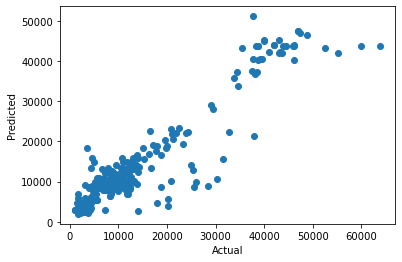

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='charges'>

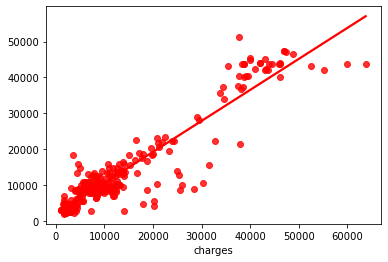

In [69]:
sns.regplot(x=y_test, y = y_pred, ci = None, color = 'red')

In [70]:
pred_df= pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
900,8688.85885,8947.267711,-258.408861
1064,5708.86700,9610.153707,-3901.286707
1256,11436.73815,8481.360027,2955.378123
298,38746.35510,43651.233224,-4904.878124
237,4463.20510,8601.989638,-4138.784538
...,...,...,...
534,13831.11520,13150.259541,680.855659
542,13887.20400,13835.184994,52.019006
760,3925.75820,8632.428198,-4706.669998
1284,47403.88000,47001.588665,402.291335


In [ ]:
#import pickle
#pickle.dump(rfc,open('model.pkl','wb'))
#pickle.dump(ms,open('minmaxscaler.pkl','wb'))